Introduction:

Explatory analysis on movie dataset 

Questions to be answered :
1) Which are the movies with the third-lowest and third-highest budget?

2) What is the average number of words in movie titles between the years 2000-2005?

3) What is the most common Genre for Vin Diesel & Emma Watson movies?



4) What is the average runtime of movies in the year 2006?

In [ ]:
#import the important libraries
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [1]:
#now import the dataset
data=pd.read_csv('/content/drive/MyDrive/tmdb-movies.csv')
data.head(10)

NameError: ignored

Obsevations from the data set
1.) No unit of currency is mentioned in the dataset. So for my analysis I will take it as dollar as it is the most used international currency.

2.) vote_count is different for all the movies, so we cannot directly conculed the popularity of the movies based on the average vote count

Data Cleaning (Removing the unused information from the dataset )
Important observation regarding this process

We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.

Removing the duplicacy in the rows(if any).

Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries

Changing release date column into date format.

Replacing zero with NAN in runtime column.

Changing format of budget and revenue column.

1. Removing Unused columns

Columns that we need to delete are - id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [ ]:
#creating a list of columns to delete 
del_col=['id','imdb_id','popularity','budget_adj','revenue_adj','homepage','keywords','overview','production_companies','vote_average']

#delete the columns
data=data.drop(del_col,1)

#review the dataset
data.head(10)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,release_year
0,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,The man behind the myth,103,Mystery|Drama,6/19/2015,425,2015
1,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,"A serial killer who can see your future, a psy...",101,Crime|Drama|Mystery,9/3/2015,474,2015
2,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,NaN,95,Thriller,4/17/2015,81,2015
3,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,NaN,108,Action|Adventure|Fantasy,6/24/2015,27,2015
4,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,105,Comedy|Drama,6/12/2015,569,2015
5,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,Find your equal.,101,Drama|Romance|Science Fiction,9/4/2015,135,2015
6,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,NaN,0,Fantasy|Action|Adventure,12/19/2015,11,2015
7,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,Fast & furry-ous,92,Adventure|Animation|Comedy|Family,12/17/2015,278,2015
8,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,NaN,8,Adventure|Animation|Family,3/9/2015,475,2015
9,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,Leave the real world behind,119,Action|Drama|Science Fiction,9/26/2015,161,2015


In [ ]:
#removing the duplicacy in the rows 
rows,col=data.shape
#we need to reduce the count of rows by 1 as there is a header row also
print('the number of rows are {} and the columns {} in the total entries of movies'.format(rows-1,col))

the number of rows are 10865 and the columns 11 in the total entries of movies


In [ ]:
#now to see if there are null values  and also data type using info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10866 non-null  int64 
 1   revenue         10866 non-null  int64 
 2   original_title  10866 non-null  object
 3   cast            10790 non-null  object
 4   director        10822 non-null  object
 5   tagline         8042 non-null   object
 6   runtime         10866 non-null  int64 
 7   genres          10843 non-null  object
 8   release_date    10866 non-null  object
 9   vote_count      10866 non-null  int64 
 10  release_year    10866 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 933.9+ KB


In [ ]:
#removing the duplicates in the dataset
data.drop_duplicates(keep='first',inplace=True)
#review the dataset
rows , col = data.shape
print('the number of rows are {} and the columns {} in the total entries of movies'.format(rows-1,col))

the number of rows are 10864 and the columns 11 in the total entries of movies


In [ ]:
#creating the revenue and budget column list separately
reb_bud=['budget','revenue']

#replace the 0's with NAN
data[reb_bud]=data[reb_bud].replace(0,np.NAN)

#removing the NAN values in the columns
data.dropna(subset=reb_bud,inplace=True)

rows , col = data.shape
print('the number of rows are {} and the columns {} in the total entries of movies'.format(rows-1,col))

the number of rows are 3853 and the columns 11 in the total entries of movies


In [ ]:
#now changing the release date to the standard date format
data.release_date=pd.to_datetime(data['release_date'])
data.head(5)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,release_year
5697,1.0,100.0,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,A comedy about a guy who would do anything to ...,95,Comedy|Romance,1999-04-23,14,1999
5699,1.0,1378.0,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,Here comes the ride.,90,Comedy|Romance,2011-06-03,55,2011
5700,2.0,16.0,Death Wish 2,Charles Bronson|Jill Ireland|Vincent Gardenia|...,Michael Winner,First His Wife. Now His Daughter. It's Time To...,88,Action|Crime|Thriller,1982-02-20,27,1982
5701,3.0,43.0,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,Taika Waititi,"Summer, Girls, Gangs, Drugs ... its not easy b...",87,Drama|Comedy,2010-02-14,26,2010
5703,3.0,16.0,Tales from the Darkside: The Movie,Rae Dawn Chong|Christian Slater|Deborah Harry|...,John Harrison,From the depths of four twisted minds.,93,Fantasy|Horror|Comedy,1990-05-03,37,1990


In [ ]:
#replacing the 0's to NAN in runtime column
data['runtime']=data['runtime'].replace(0,np.NAN)

=======================================================

Explatory Data Analysis

1.Which are the movies with the third-lowest and third-highest budget?

In [ ]:
#By sorting the values in the excel in ascending form by budget,
data.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,release_year
5697,1.0,100.0,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,A comedy about a guy who would do anything to ...,95,Comedy|Romance,1999-04-23,14,1999
5699,1.0,1378.0,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,Here comes the ride.,90,Comedy|Romance,2011-06-03,55,2011
5700,2.0,16.0,Death Wish 2,Charles Bronson|Jill Ireland|Vincent Gardenia|...,Michael Winner,First His Wife. Now His Daughter. It's Time To...,88,Action|Crime|Thriller,1982-02-20,27,1982


In [ ]:
#here I showed the lowest budgets by viewing the tail
data.tail(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,release_year
10863,300000000.0,9.610000e+08,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,"At the end of the world, the adventure begins.",169,Adventure|Fantasy|Action,2007-05-19,2626,2007
10864,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,136,Adventure|Action|Fantasy,2011-05-11,3180,2011
10865,425000000.0,1.108757e+07,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,2010


As you can see in the results the third highest budget is "The Pirates of the Carribean: At World's end"

The third lowest budget is "Death Wish 2"

 2) What is the average number of words in movie titles between the years 2000-2005?

In [ ]:
#sort the data by release_year and slice the data into a list 
data.sort_values(by='release_year', ascending=True , ignore_index=True, inplace=True)
ori=data['original_title'][1354:2138]
#from collections import Counter

#create a function that splits the movie titles into the words and count the number of words
def convert(lst):
   avg=' '.join(lst).split()
   avg=len(avg)
   print("The average words of the movie titles is")
   print(avg)
rele=data['release_year']

convert(ori)



The average words of the movie titles is
2107


3) Which are the movies with the most and least earned revenue?

In [ ]:
#now writing the function for calculating the budget
import pprint
def calculate(column):
  #for the highest earned budget
  high=data[column].idxmax()
  high_details=pd.DataFrame(data.loc[high])

  #for the lowest earned budget
  low=data[column].idxmin()
  low_details=pd.DataFrame(data.loc[low])

  #collecting the data in one place
  info=pd.concat([high_details,low_details],axis=1)

  return info

#call the function
calculate('revenue')  

,2665,920
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
tagline,Enter the World of Pandora.,They're not there to shop. They're not there t...
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy
release_date,2009-12-10 00:00:00,1995-10-20 00:00:00
vote_count,8458,201


As you can see the movie title "Avatar" is the most revenue by 2.37e+08 and least is
"Shattered Glass" by 6e+06


4) What is the average runtime of movies in the year 2006?

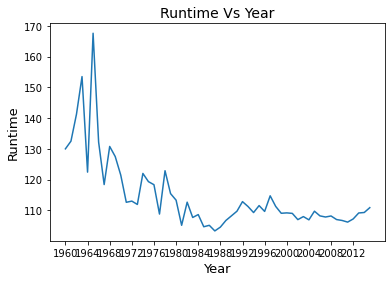

In [ ]:
data.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,4))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

In [ ]:
avg=data.groupby('release_year').mean()['runtime']

print(avg)

release_year
1960    130.000000
1961    132.500000
1962    141.285714
1963    153.500000
1964    122.428571
1965    167.600000
1966    132.200000
1967    118.384615
1968    130.777778
1969    127.500000
1970    121.454545
1971    112.615385
1972    113.000000
1973    111.916667
1974    122.000000
1975    119.333333
1976    118.333333
1977    108.789474
1978    122.882353
1979    115.437500
1980    113.304348
1981    105.133333
1982    112.653846
1983    107.677419
1984    108.619048
1985    104.658537
1986    105.125000
1987    103.304348
1988    104.543860
1989    106.705882
1990    108.207547
1991    109.720000
1992    112.830189
1993    111.236111
1994    109.274194
1995    111.543210
1996    109.639535
1997    114.722222
1998    111.271739
1999    109.043103
2000    109.169811
2001    109.008264
2002    106.976378
2003    107.966942
2004    106.904762
2005    109.717791
2006    108.189349
2007    107.830303
2008    108.161677
2009    107.000000
2010    106.702247
2011    106.170854

As you can see the runtime of the year 2006 is 108.189349 hrs